### Notebook: Neuroscience Data Analysis with Python Workshop – MiniProject #1
##### Laptop Dataset – Full Statistical Analysis
##### Eden Elkoubi 332548593



### Imports and Data Loading
##### In this section, we import the necessary libraries for data manipulation (Pandas, NumPy), visualization (Matplotlib, Seaborn), and statistical analysis. We then load the dataset into a DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading the dataset from the local filesystem 
df = pd.read_csv('laptop_price - dataset.csv')

# Displaying basic information to understand the structure
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


### Data Cleaning - Standardizing Operating Systems
##### The dataset contained inconsistent names for the same operating systems (e.g., different Windows versions). To ensure accurate analysis, we map these into uniform categories.

In [2]:
# Checking unique values before cleaning
print("Original OpSys values:", df['OpSys'].unique())

# Mapping inconsistent names to uniform categories 
opsys_map = {
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Windows 10 S': 'Windows',
    'macOS': 'Mac OS',
    'Mac OS X': 'Mac OS',
    'No OS': 'No OS',
    'Linux': 'Linux',
    'Chrome OS': 'Chrome OS',
    'Android': 'Android'
}

df['OpSys'] = df['OpSys'].map(opsys_map).fillna(df['OpSys'])
print("Cleaned OpSys values:", df['OpSys'].unique())

Original OpSys values: ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
Cleaned OpSys values: ['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


### Company Price Analysis
##### We calculate the average laptop price per company to identify which brand is the most expensive on average.

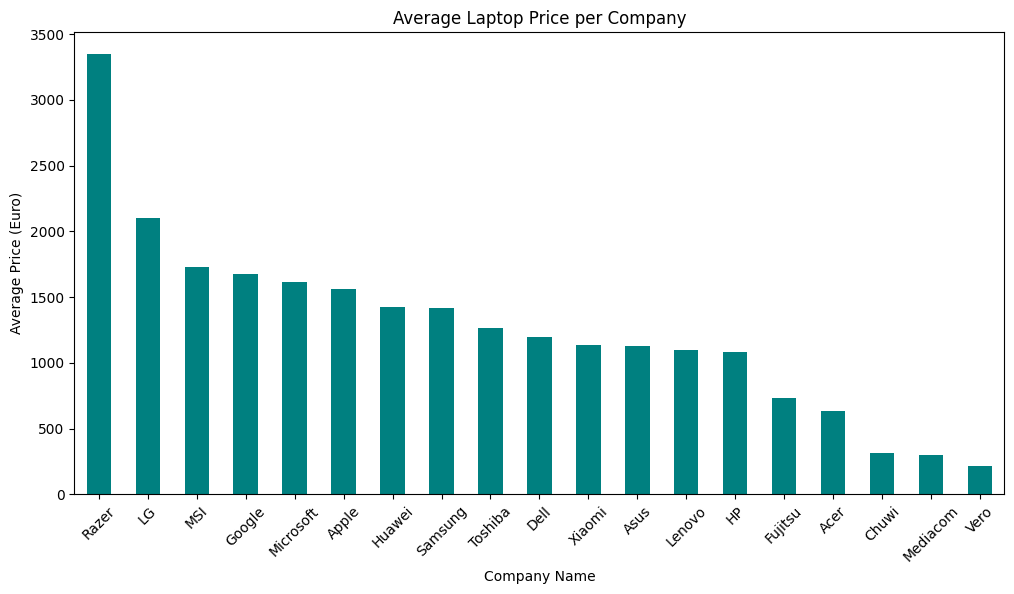

The most expensive company on average is: Razer


In [3]:
# Calculating the mean price per company
company_avg = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)

# Plotting the results with required titles and units 
plt.figure(figsize=(12,6))
company_avg.plot(kind='bar', color='teal')
plt.title('Average Laptop Price per Company')
plt.xlabel('Company Name')
plt.ylabel('Average Price (Euro)') # Units included 
plt.xticks(rotation=45)
plt.show()

print(f"The most expensive company on average is: {company_avg.index[0]}")

### Price Distribution by Operating System
##### According to the requirements, we generate a separate distribution plot for each unique operating system found in the data.

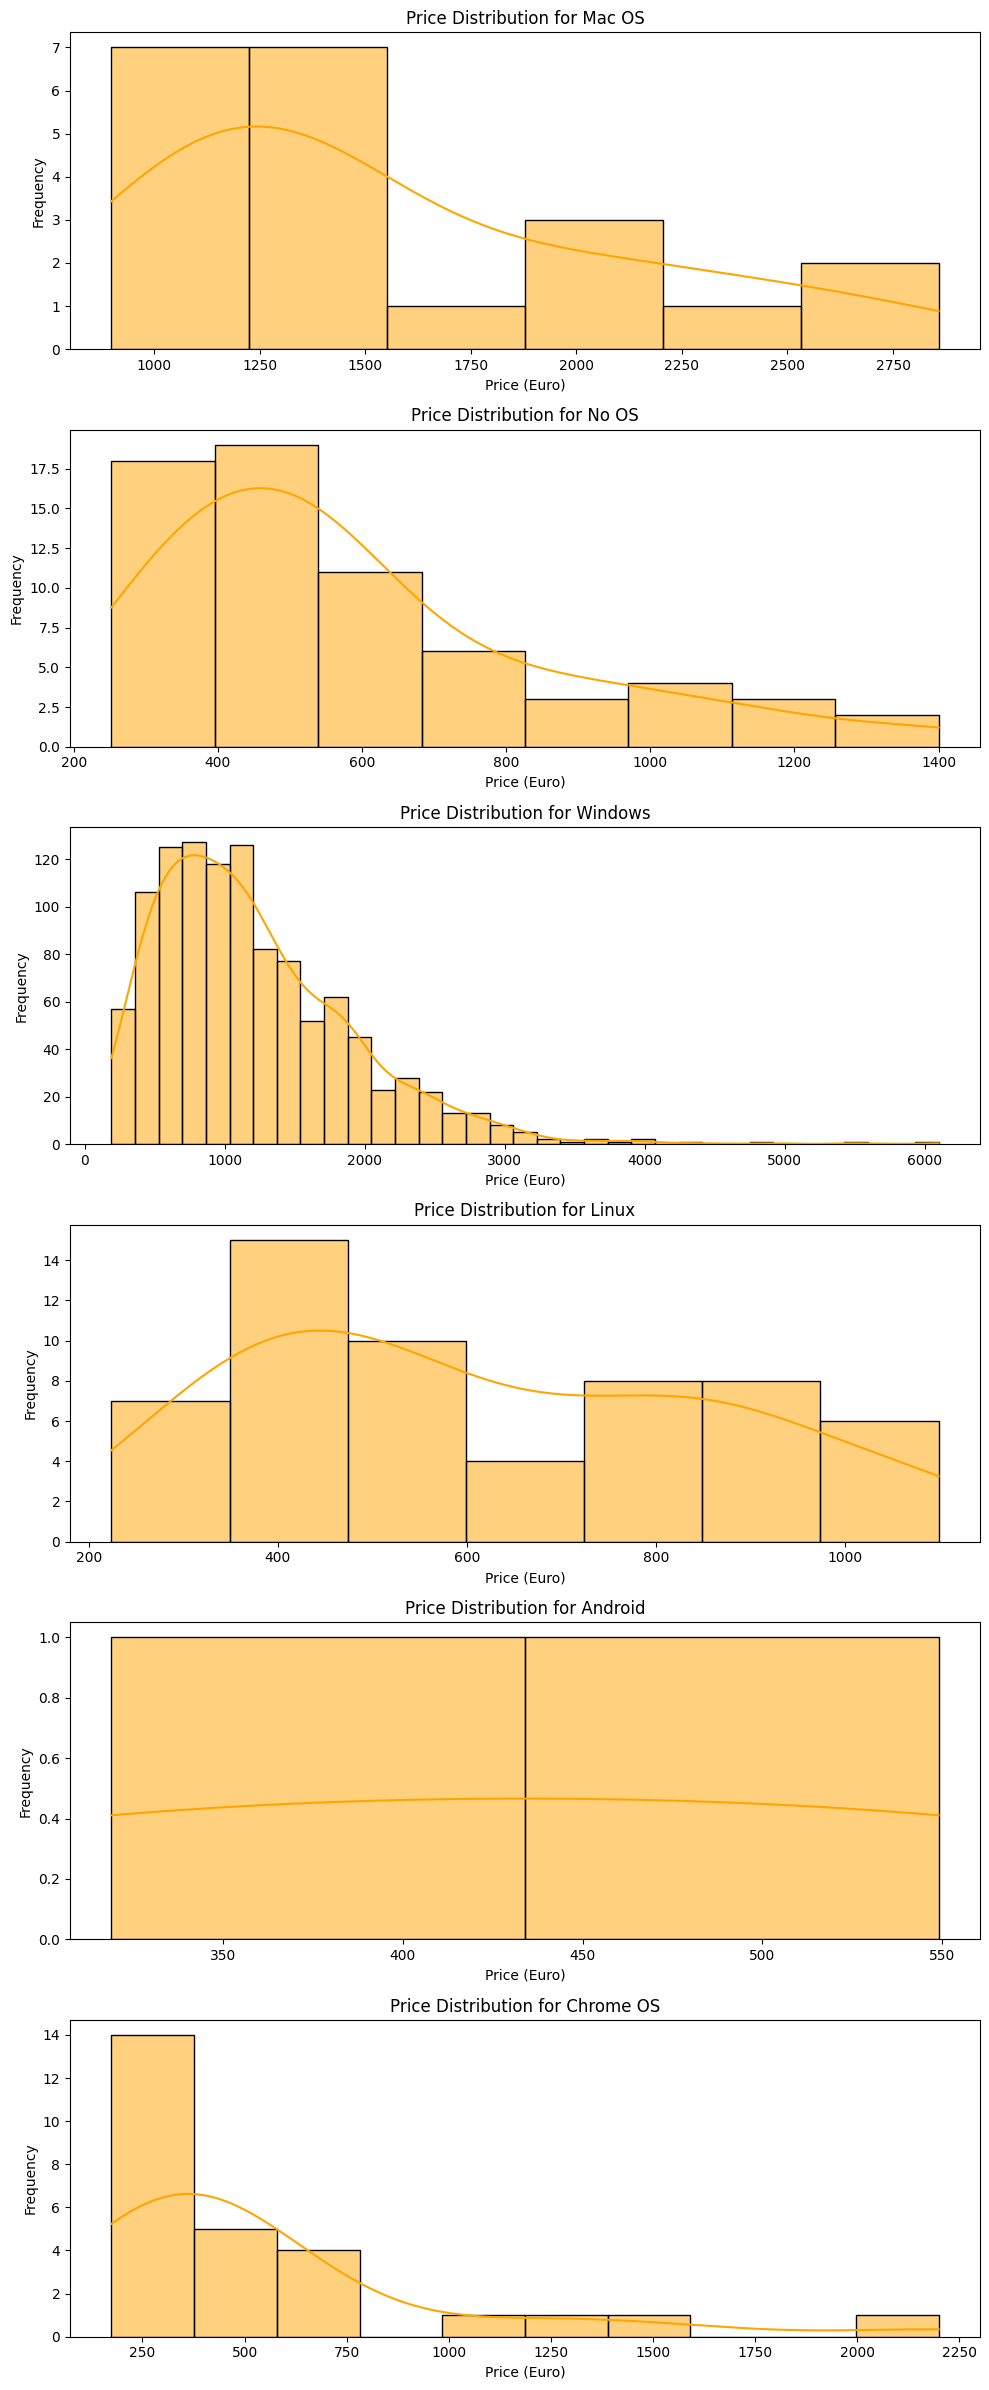

In [4]:
unique_ops = df['OpSys'].unique()
# Creating subplots: one for each unique OS 
fig, axes = plt.subplots(len(unique_ops), 1, figsize=(10, 4 * len(unique_ops)))

for i, os in enumerate(unique_ops):
    sns.histplot(df[df['OpSys'] == os]['Price (Euro)'], kde=True, ax=axes[i], color='orange')
    axes[i].set_title(f'Price Distribution for {os}')
    axes[i].set_xlabel('Price (Euro)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### RAM vs. Price and Outlier Detection
##### We analyze the relationship between RAM and price using a scatter plot. We also define and detect outliers using the Interquartile Range (IQR) method.

##### In this analysis, an outlier is defined as a data point that deviates significantly from the rest of the distribution. We detect these using the Interquartile Range (IQR) method: any value falling more than 1.5 times the IQR above the third quartile (Q3) or below the first quartile (Q1) is flagged as an outlier.

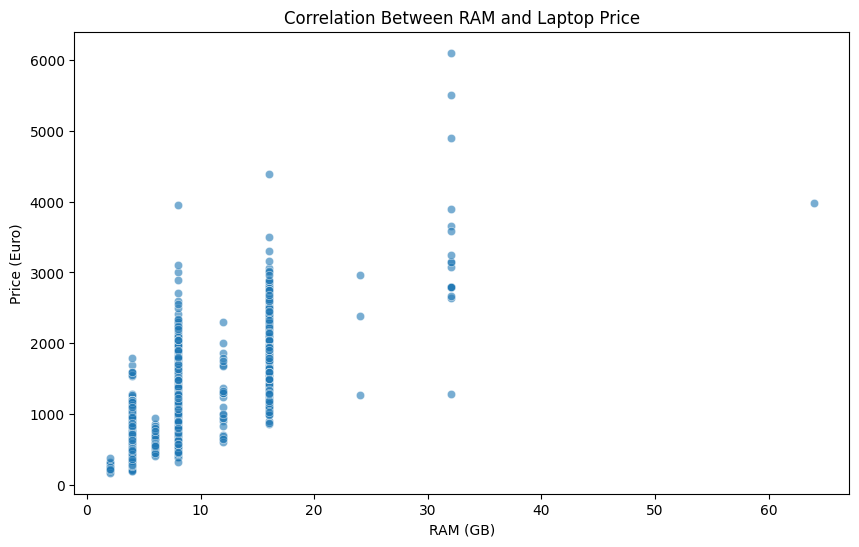

Detected 28 outliers based on Price.


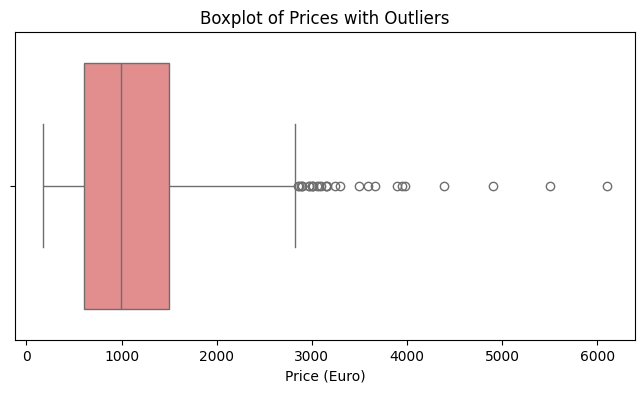

In [5]:
# Scatter plot to show correlation 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='RAM (GB)', y='Price (Euro)', alpha=0.6)
plt.title('Correlation Between RAM and Laptop Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.show()

# Outlier Detection using IQR 
Q1 = df['Price (Euro)'].quantile(0.25)
Q3 = df['Price (Euro)'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Defining outliers as values outside 1.5 * IQR range
outliers = df[(df['Price (Euro)'] > upper_bound) | (df['Price (Euro)'] < lower_bound)]
print(f"Detected {len(outliers)} outliers based on Price.")

# Visualizing outliers with a Boxplot 
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Price (Euro)'], color='lightcoral')
plt.title('Boxplot of Prices with Outliers')
plt.xlabel('Price (Euro)')
plt.show()

In [6]:
# Show the first 5 outliers to see which laptops they are
print("Top Outliers:")
display(outliers.sort_values(by='Price (Euro)', ascending=False).head())

Top Outliers:


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel,Core i7 7820HK,2.9,32,1TB SSD,Nvidia,GeForce GTX 1080,Windows,3.49,6099.0
830,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel,Core i7 7820HK,2.9,32,512GB SSD,Nvidia,GeForce GTX 1080,Windows,3.49,5499.0
610,Lenovo,Thinkpad P51,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel,Xeon E3-1535M v6,3.1,32,1TB SSD,Nvidia,Quadro M2200M,Windows,2.50,4899.0
749,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel,Xeon E3-1535M v5,2.9,16,256GB SSD,Nvidia,Quadro M2000M,Windows,3.00,4389.0
1066,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel,Core i7 6820HK,2.7,64,1TB SSD,Nvidia,GeForce GTX 980,Windows,3.58,3975.0


### Feature Engineering - Storage Type Extraction
##### We extract the storage hardware type (SSD, HDD, etc.) from the "Memory" column to create a new "Storage type" feature.

In [7]:
# Defining a function to extract hardware type 
def get_storage_type(memory_str):
    if 'SSD' in memory_str: return 'SSD'
    if 'HDD' in memory_str: return 'HDD'
    if 'Flash Storage' in memory_str: return 'Flash Storage'
    if 'Hybrid' in memory_str: return 'Hybrid'
    return 'Other'

# Applying the function to create the new column 
df['Storage type'] = df['Memory'].apply(get_storage_type)

# Displaying the first few rows of the new column
print(df[['Memory', 'Storage type']].head())

                Memory   Storage type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD
